# Data Visualization with Python

In this workshop you will be introduced to some of Python's utilities for data visualization. By then end, you should know how to display your data in publication-worthy figures, and how to navigate the Matplotlib documentation to fully customize your plots.

## Matplotlib Documentation

Matplotlib is Python's library for visualization. It has extensive documentation available [online](https://matplotlib.org/stable/), including many [tutorials](https://matplotlib.org/stable/tutorials/index.html). Within Matplotlib, you will mostly be working with pyplot to generate simple plots. You can view the documentation for pyplot [here](https://matplotlib.org/stable/api/pyplot_summary.html#module-matplotlib.pyplot). Each function within pyplot has detailed descriptions of the arguments it takes - these will be very useful when you would like to customize your plots.

## Importing matplotlib.pyplot

To import matplotlib.pyplot, simply type `import matplotlib.pyplot as plt` at the top of your code. You can then refer to the library as `plt` in your code as needed.

## General Workflow for Creating Figures

In general, the recipe for creating a figure is as follows:

1. Import matplotlib.pyplot to have access to the library and functions
2. Generate the figure and axes
3. Generate the data to be plotted. This is generally a list of x values and a list of y values.
4. Plot the data on the appropriate axis or axes using functions such as `plot()`, `scatter()`, `bar()`, etc..
5. Customize your plot using the built-in options for the function you used to plot.
6. Render your plot using `show()` and save or export it if you wish.

## Figures, Plots, and Subplots

In Python, the best way to make a figure is by using the [`subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function to define a figure and set(s) of axes. The reason we use the `subplots()` function is that it makes it easy to add multiple plots/axes to a figure, which is commonly done in the visualization of scientific data. To define a figure, you can write

```
fig, ax = plt.subplots()
```

Here, `fig` is your figure, and `ax` is your set of axes where you will plot your data. You can specify the size of the figure using the `figsize` option. Type `figsize = (x, y)`, where `x` and `y` are the horizontal and vertical dimensions of the figure in inches, inside the parentheses.

At the bottom of your code, type `plt.show()` to render your plot.

**In the code box below, generate a figure and set of axes with measurements (3, 2) and render it.**

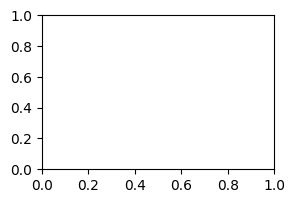

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(3, 2))

plt.show()

 ### Multiple Subplots
 
As mentioned previously, `subplots()` allows you to create multiple plots within one figure. Look at the code below and notice how rows and columns of subplots are generated differently. Note that we can still use `figsize` to set the overall size of the figure, and the subplots will fit into that. Finally, you can change the internal proportions of the subplots using the `width_ratios` and `height_ratios` options. You can also force the subplots to share x or y axes using the `sharex` and `sharey` options. To create a plot with two subplots arranged horizontally, you would use the following:

```
fig1, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
```

Here, the `nrows` represents the number of rows, and `ncols` represents the number of columns. If you wanted to make a plot with two subplots arranged vertically, you would instead type

```
fig2, ((ax3), (ax4)) = plt.subplots(nrows = 2, ncols = 1)
```

Note how the parentheses around the axes are laid out differently when they are defined for vertical and horizontal arrangements. You can think of this as a matrix-style notation where each inner set of parentheses represents a row.

**In the box below, define a 2x2 subplot with `figsize`, `height_ratios`, and `width_ratios` specified. Call the axes `northwest`, `northeast`, `southwest`, and `southeast`.**

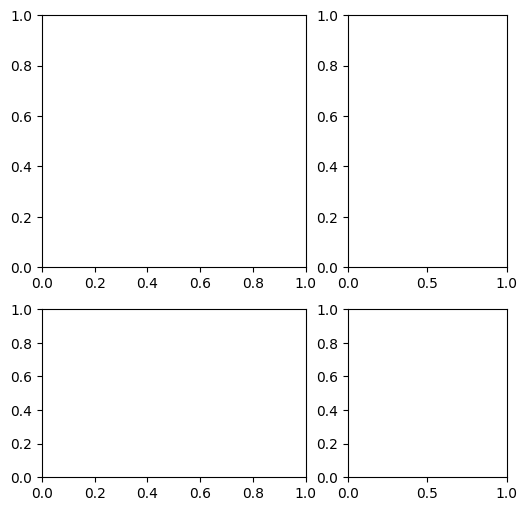

In [2]:
fig3, ((northwest, northeast), (southwest, southeast)) = plt.subplots(nrows=2, ncols=2, figsize=(6, 6), height_ratios=(1.5, 1), width_ratios=(5, 3))

plt.show()

## Importing Data

Let's import some data that we will use for this segment. Ours is saved in the 'data-brc' folder in a file called 'height-weight.csv'. You can import the four arrays using a handy function from NumPy called [`genfromtxt()`](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html). Try printing the arrays to see what they look like. 

```
id, sex, height, weight = np.genfromtxt('data-brc/height-weight.csv', unpack = True)
```

In [3]:
# Import data
sex, height, weight = np.genfromtxt('data-brc/height-weight.csv', unpack = True, delimiter = ",", skip_header=True, dtype = None)
print(sex, height, weight)

[b'Male' b'Male' b'Male' b'Male' b'Female' b'Female' b'Female' b'Female'
 b'Male' b'Male' b'Female' b'Female' b'Male' b'Female' b'Female' b'Male'
 b'Male' b'Male' b'Male' b'Male' b'Male' b'Female' b'Male' b'Female'
 b'Female' b'Male' b'Male' b'Male' b'Male' b'Male' b'Female' b'Male'
 b'Male' b'Female' b'Male' b'Female' b'Male' b'Female' b'Male' b'Female'
 b'Male' b'Female' b'Female' b'Female' b'Female' b'Female' b'Female'
 b'Female' b'Male' b'Female' b'Female' b'Female' b'Female' b'Female'
 b'Male' b'Female' b'Female' b'Female' b'Male' b'Male' b'Female' b'Male'
 b'Female' b'Male' b'Male' b'Female' b'Male' b'Female' b'Male' b'Female'
 b'Female' b'Male' b'Male' b'Female' b'Male' b'Female' b'Male' b'Male'
 b'Female' b'Female' b'Female' b'Female' b'Male' b'Female' b'Female'
 b'Female' b'Female' b'Male' b'Female' b'Male' b'Male' b'Male' b'Female'
 b'Male' b'Female' b'Female' b'Female' b'Female' b'Female' b'Female'] [182.87 179.12 169.15 175.66 164.47 158.27 161.69 165.84 181.32 167.37
 160.

C:\Users\Claire\AppData\Local\Temp\ipykernel_21020\3322944013.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  sex, height, weight = np.genfromtxt('data-brc/height-weight.csv', unpack = True, delimiter = ",", skip_header=True, dtype = None)


## Scatter Plots
### Marker Styles, Colors, Error Bars, and Title/Axis Labels

In this section, we will cover the scatter plot, which uses the `scatter()` function in `matplotlib.pyplot`. Scatter plots are used for displaying discrete data points, where each point has a set of coordinates $(x,y)$. If you want to plot data points $(x_1, y_1), (x_2, y_2) ... (x_n, y_n)$ from lists $x = (x_1, x_2,...,x_n)$ and $y = (y_1, y_2,...,y_n)$, you can simply write 

```
ax.scatter(x, y)
```
to plot your data on the axis `ax`. Today, we are going to create a plot of patient height vs weight, with height on the y axis.

**Try this for yourself in the box below with the provided data and figure/axes.**

First, define your figure and axes, and then use `scatter()` to plot the data. Remember to type `show()` at the end!

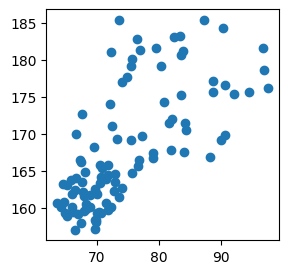

In [12]:
# Define your figure
fig, ax = plt.subplots(figsize=(3, 3))

# Plot your data here
ax.scatter(weight, height)

plt.show()

This is a perfectly fine scatter plot, but we would like to customize it a bit more. To look at the options for scatter plots, you can find the full documentation for `matplotlib.pyplot.scatter()` [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html). In particular, here we will look at the ways we can customize markers. In particular, you will want to set values for 

* `s`: marker size in points ^2 (don't ask why...). 
* `color (c)`: marker color. Enter a string that could include a named color, RBG code, or hex color code. Find a full guide to specifying colors [here](https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def).
* `marker`: marker style. Choose between a variety of preset options, the default being 'o' for circles. View the full list of options [here](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers).
* `linewidths`: width of the marker outline. Enter number in pts.
* `edgecolors`: color of the marker outline. Enter as a string, similar to the value of `c`.

### Matplotlib Named Colors

See below a list of the names colors in matplotlib. Use these to customize your scatter plot!

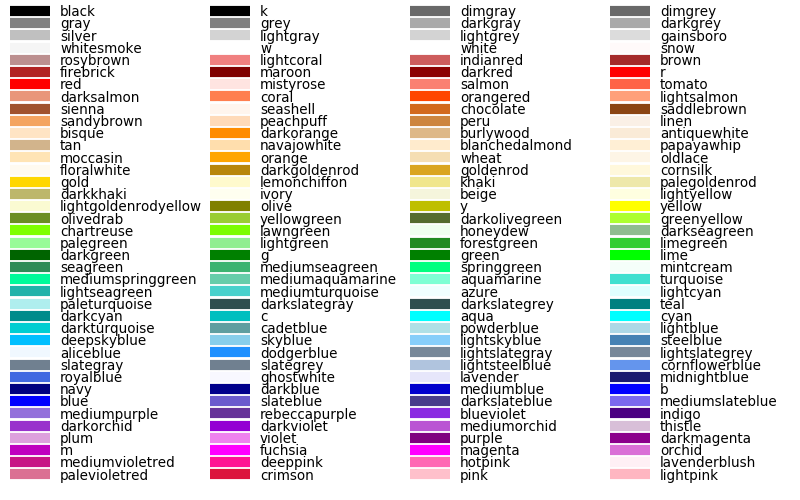

**Try adding these options to the scatter plot in the code below.**

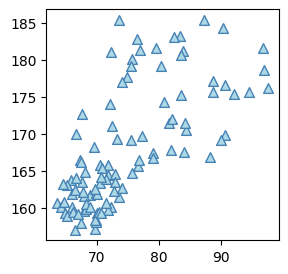

In [13]:
# Define your figure
fig, ax = plt.subplots(figsize=(3, 3))

# Plot your data here
ax.scatter(weight, height, s=49, color="lightblue", marker="^", linewidths=1, edgecolors="steelblue")

plt.show()

### Titles and Axis Labels

Finally, we would like to add a title and axis labels to our plot. You can do this using the `set_title()` function, as well as the `set_xlabel()` and `set_ylabel()` functions, acting on your axis. The argument of each function should be a string representing your desired title or label. 

**Add a title and axis labels to your plot in the code below.**

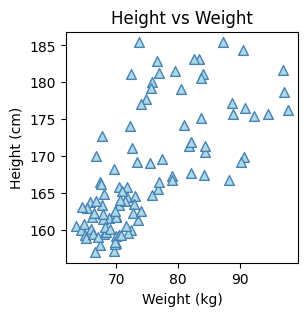

In [38]:
# Define your figure
fig, ax = plt.subplots(figsize=(3, 3))

# Plot your data here
ax.scatter(weight, height, s=49, color="lightblue", marker="^", linewidths=1, edgecolors="steelblue")

ax.set_title("Height vs Weight")
ax.set_xlabel("Weight (kg)")
ax.set_ylabel("Height (cm)")

plt.show()

### Error Bars

It is common to include error bars on a scatter plot to visualize the uncertainty of each data point. To create a scatter plot with error bars, you will need to use the `errorbar()` function instead of `scatter()`. Note that you can use `errorbar()` even if you don't want to add error bars to your plot for consistency. You can view the full documentation for `errorbar()` [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html). 

In addition to the usual `x` and `y` arguments, `errorbar()` takes **optional** `xerr` and `yerr` arguments, representing the horizontal and vertical error bars. These can be just a number, or a list matching the length of the data if you want individually specified error bars.

Note: If you would like **asymmentic error bars** you can specify the `xerr` or `yerr` value as a shape(2,N) array or list. The first list will specify the lower errors and the second will specify the upper errors.

## Line Plots
### Axis Scaling, Lines and Filled Areas, Axis Bounds, and Legends

Another common type of plot is a line plot. Line plots can be created using the `plot()` function. The full documentation for `plot()` can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). In the most basic implementation of `plot()`, the two arguments are simply the lists of arrays of x and y values.

### Plotting Data with `plot()`

You can use the `plot()` function to plot real data. Let's say we now want to plot our height vs weight data, but this time separating by sex. We then would like to plot a line of best fit for each dataset.

First, we need to separate out our data by gender. Let's use a for loop to do this.

In [5]:
#print(sex)

height_m = []
height_f = []
weight_m = []
weight_f = []


for i in range(len(sex)):
    if sex[i] == b'Male':
        height_m.append(height[i])
        weight_m.append(weight[i])
    else:
        height_f.append(height[i])
        weight_f.append(weight[i])


Now that we have out data, let's generate a scatter plot that differentiates between the two.

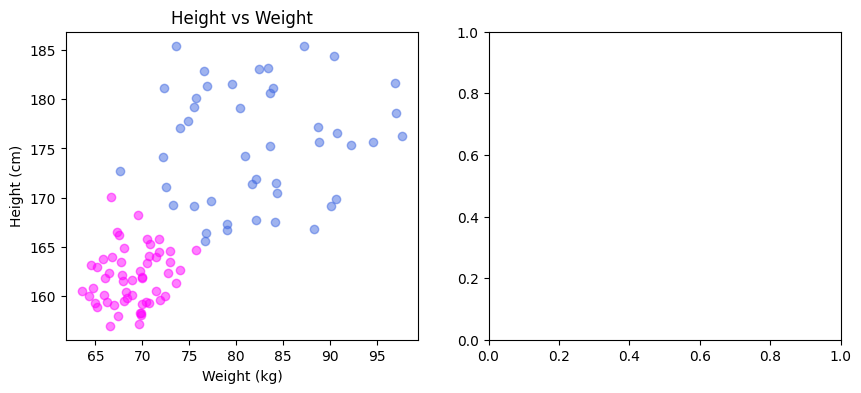

In [6]:
# Generate figure and axes
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize=(10, 4))

# Plot data
ax1.scatter(weight_m, height_m, c = 'royalblue', alpha = 0.5)
ax1.scatter(weight_f, height_f, c = 'magenta', alpha = 0.5)

ax1.set_title("Height vs Weight")
ax1.set_xlabel("Weight (kg)")
ax1.set_ylabel("Height (cm)")

plt.show()

Now, let's go about making a best fit line. The first thing we need to know are the slope ($m$) and the intercept ($b$) of each line $y = mx + b$. To find these parameters, we can use the function `curve_fit()`. This function allows us to define an arbitrary (single-variable) function and then fit our data to find the best values of the variables.

In [8]:
from scipy.optimize import curve_fit 

# define the function with the independent variable first, followed by fit parameters
def line(x, m, b):
    return  m * x + b

popt_m, pcov_m = curve_fit(f=line, xdata=weight_m, ydata=height_m)
popt_f, pcov_f = curve_fit(f=line, xdata=weight_f, ydata=height_f)


Now we have out slope and intercept for each line. To do this, we will use the `plot()` function from `matplotlib.pyplot`. It is important to remember that in Python, you are always plotting a discrete set of points even if you are trying to visualize a continuous function. To create a continuous-looking line plot, simply generate a large number of points so that the line appears smooth. To make the function look continuous, let's plot this across 100 points on the x axis. We can do this using the `linspace()` function from `numpy` to generate a list of x values. In addition to out axis labels, we can also add a legend using the `plt.legend()` function. Full documentation can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html), but for now we will just specify the location. Any plot you want added to the legend simply needs a `label` parameter added. In the box below:

1. Add line plots for the best fits
2. Add labels and a legend

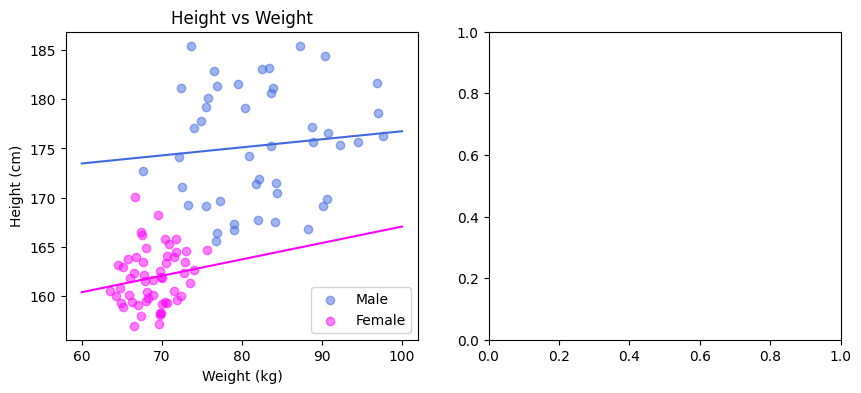

In [9]:
x = np.linspace(start=60, stop=100, num=100)


# Generate figure and axes
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize=(10, 4))

# Plot data
ax1.scatter(weight_m, height_m, c = 'royalblue', alpha = 0.5, label = 'Male')
ax1.scatter(weight_f, height_f, c = 'magenta', alpha = 0.5, label='Female')

ax1.plot(x, line(x, *popt_m), c = 'royalblue')
ax1.plot(x, line(x, *popt_f), c = 'magenta')

ax1.set_title("Height vs Weight")

ax1.set_xlabel("Weight (kg)")

ax1.set_ylabel("Height (cm)")

ax1.legend(loc = 'lower right')

plt.show()

## Histograms

Another common type of plot is the histogram. Let's use the `numpy.histogram()` function to generate a histogram of our height data and then plot it. The full documentation can be found [here](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html). Let's start with a basic histogram, where we will just specify the data and the number of bins (the default is 10 but let's use 5). We can then plot the histogram using `matplotlib.pyplot.hist()`.

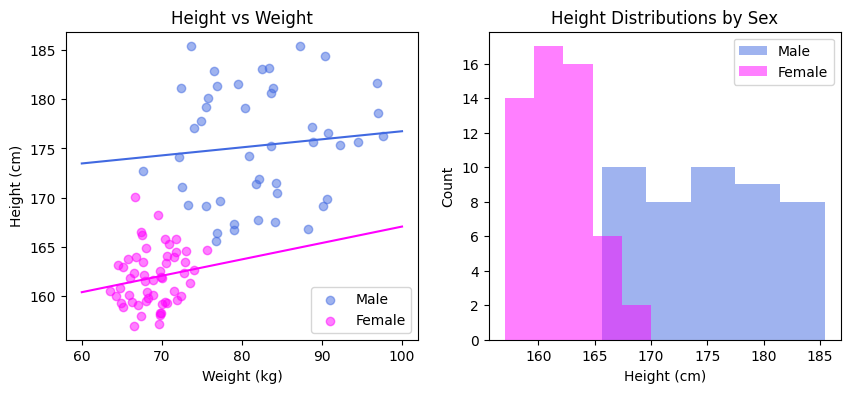

In [10]:
# Generate figure and axes
fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, figsize=(10, 4))

# Plot data
ax1.scatter(weight_m, height_m, c = 'royalblue', alpha = 0.5, label = 'Male')
ax1.scatter(weight_f, height_f, c = 'magenta', alpha = 0.5, label='Female')

ax1.plot(x, line(x, *popt_m), c = 'royalblue')
ax1.plot(x, line(x, *popt_f), c = 'magenta')

ax1.set_title("Height vs Weight")
ax1.set_xlabel("Weight (kg)")
ax1.set_ylabel("Height (cm)")
ax1.legend(loc = 'lower right')


ax2.hist(height_m, bins=5, color = 'royalblue', alpha = 0.5, label = 'Male')
ax2.hist(height_f, bins=5, color = 'magenta', alpha = 0.5, label = 'Female')

ax2.set_ylabel('Count')
ax2.set_xlabel('Height (cm)')
ax2.legend(loc = 'upper right')

ax2.set_title('Height Distributions by Sex')

plt.show()




## Violin Plots

The final type of plot we are going to cover today is called a violin plot. This is another type of histogram - let's make one for the weight distributions of the male and female patients. 

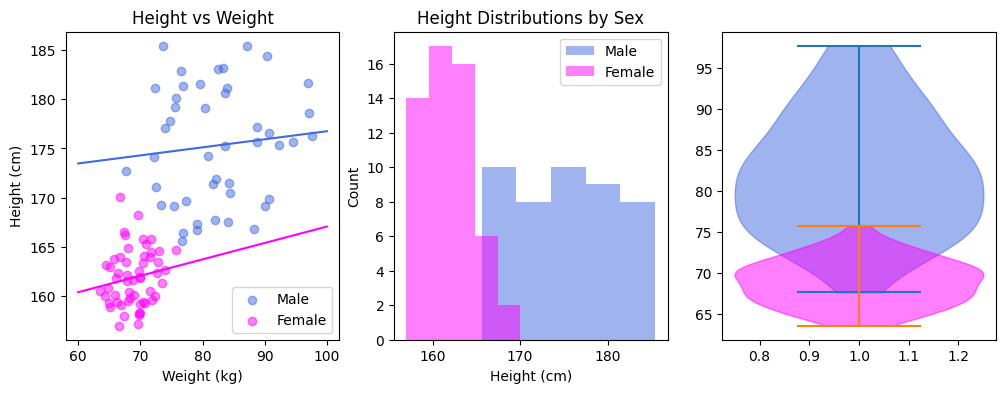

In [77]:
# Generate figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, nrows = 1, figsize=(12, 4))

# Plot data
ax1.scatter(weight_m, height_m, c = 'royalblue', alpha = 0.5, label = 'Male')
ax1.scatter(weight_f, height_f, c = 'magenta', alpha = 0.5, label='Female')

ax1.plot(x, line(x, *popt_m), c = 'royalblue')
ax1.plot(x, line(x, *popt_f), c = 'magenta')

ax1.set_title("Height vs Weight")
ax1.set_xlabel("Weight (kg)")
ax1.set_ylabel("Height (cm)")
ax1.legend(loc = 'lower right')

ax2.hist(height_m, bins=5, color = 'royalblue', alpha = 0.5, label = 'Male')
ax2.hist(height_f, bins=5, color = 'magenta', alpha = 0.5, label = 'Female')

ax2.set_ylabel('Count')
ax2.set_xlabel('Height (cm)')
ax2.legend(loc = 'upper right')

ax2.set_title('Height Distributions by Sex')

vp_m = ax3.violinplot(weight_m)
vp_f = ax3.violinplot(weight_f)

vcolors = ['royalblue', 'magenta']
vplots = [vp_m, vp_f]

for i in range(2):
    for pc in vplots[i]['bodies']:
        pc.set_facecolor(vcolors[i])
        pc.set_edgecolor(vcolors[i])
        pc.set_alpha(0.5)

plt.show()

add:
heatmap/viridis
save and export 
using functions
seaborn
